## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Stats about the Dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')

In [3]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df.keys()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Handling Missing Values

### Replace Countries with the most frequent Country (mode).

### Replace Director and Cast Actors with 'No Data' as replacing some other person over there wouldn't benefit much.

In [9]:
df['director'].replace(np.nan, 'No Data',inplace  = True)
df['cast'].replace(np.nan, 'No Data',inplace  = True)

df['country'] = df['country'].fillna(df['country'].mode()[0])


df.dropna(inplace = True)

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.shape

(8790, 12)

In [12]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# Adding more columns

### Convert the date into datetime format for simplification.

### Seperate the year and month added to analyze the content released specifically in months or years.

### Seperate the season count for TV Shows and minutes duration for Movies.

In [13]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,9,
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,1
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,1
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,2021-09-24,2021,TV-MA,,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021,9,9
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,


# Exploratory Data Analysis

## Content Type % 

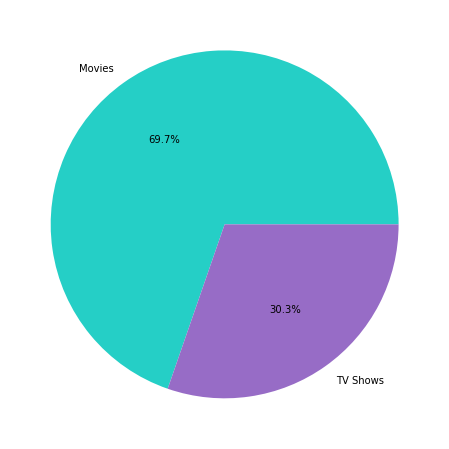

In [14]:
plt.figure(figsize = (10, 8))

content_type = df['type'].value_counts().reset_index()
content_type = pd.DataFrame(content_type.rename(columns = {'type' : "count", "index" : 'type'}))

plt.pie(content_type['count'], labels = ['Movies', 'TV Shows'], autopct = '%1.1f%%',colors = ["#25cfc6", "#976cc6"])
plt.show()

### This shows that there are more than 2/3rd of Movies on Netflix as compared to TV Shows.

### So, Netflix can continue focusing more on Movies as they are more popular.

# 

## Content Added Over The Years

In [15]:
tv_show_df = df[df["type"] == "TV Show"]

tv_show_years = tv_show_df["year_added"].value_counts().reset_index()
tv_show_years = tv_show_years.rename(columns = {"year_added" : "count", "index" : "year_added"})
tv_show_years['%age'] = tv_show_years['count'].apply(lambda x : 100 * x / sum(tv_show_years['count']))
tv_show_years = tv_show_years.sort_values("year_added")

tv_show_years

,year_added,count,%age
9,2008,1,0.037538
8,2013,5,0.187688
7,2014,5,0.187688
6,2015,26,0.975976
5,2016,175,6.569069
4,2017,349,13.100601
3,2018,411,15.427928
1,2019,592,22.222222
0,2020,595,22.334835
2,2021,505,18.956456


In [16]:
movie_df = df[df["type"] == "Movie"]

movie_years = movie_df["year_added"].value_counts().reset_index()
movie_years = movie_years.rename(columns = {"year_added" : "count", "index" : "year_added"})
movie_years['%age'] = movie_years['count'].apply(lambda x : 100 * x / sum(movie_years['count']))
movie_years = movie_years.sort_values("year_added")

movie_years

,year_added,count,%age
12,2008,1,0.016324
11,2009,2,0.032648
13,2010,1,0.016324
8,2011,13,0.212210
10,2012,3,0.048972
9,2013,6,0.097943
7,2014,19,0.310153
6,2015,56,0.914136
5,2016,251,4.097290
4,2017,836,13.646752


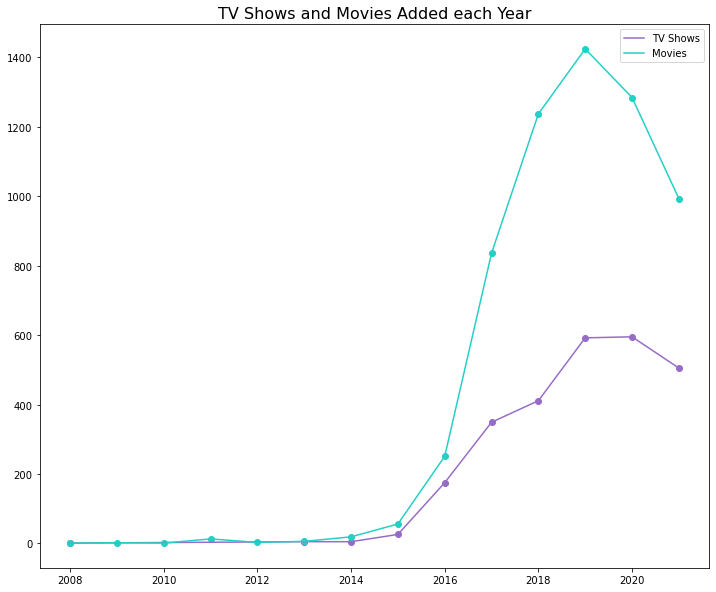

In [17]:
plt.figure(figsize = (12,10))

plt.plot(tv_show_years['year_added'], tv_show_years['count'], color = '#976cc6')
plt.scatter(tv_show_years['year_added'], tv_show_years['count'], color = '#976cc6')

plt.plot(movie_years['year_added'], movie_years['count'], color = '#25cfc6')
plt.scatter(movie_years['year_added'], movie_years['count'], color = '#25cfc6')

plt.legend(['TV Shows', 'Movies'])

plt.title('TV Shows and Movies Added each Year', size = '16')

plt.show()

### This shows that the number of Movies and TV Shows released on Netflix were quite similar till 2014, because of the low amount of content released till then.

### But, since then the number of Movies have outlasted the number of TV Shows, even though both of them have seen a slight drop in the past 2 years.

### So, Netflix should not let the content % drop but add more content to maintain and exceede previous levels of content.

# 

## Content Released Over The Years

In [18]:
tv_show_release_years = tv_show_df["release_year"].value_counts().reset_index()
tv_show_release_years = tv_show_release_years.rename(columns = {"release_year" : "count", "index" : "release_year"})
tv_show_release_years['%age'] = tv_show_release_years['count'].apply(lambda x : 100 * x / sum(tv_show_release_years['count']))
tv_show_release_years = tv_show_release_years.sort_values("release_year")

tv_show_release_years

,release_year,count,%age
43,1925,1,0.037538
44,1945,1,0.037538
36,1946,1,0.037538
45,1963,1,0.037538
34,1967,1,0.037538
38,1972,1,0.037538
42,1974,1,0.037538
40,1977,1,0.037538
39,1979,1,0.037538
37,1981,1,0.037538


In [19]:
movie_release_years = movie_df["release_year"].value_counts().reset_index()
movie_release_years = movie_release_years.rename(columns = {"release_year" : "count", "index" : "release_year"})
movie_release_years['%age'] = movie_release_years['count'].apply(lambda x : 100 * x / sum(movie_release_years['count']))
movie_release_years = movie_release_years.sort_values("release_year")

movie_release_years

,release_year,count,%age
60,1942,2,0.032648
53,1943,3,0.048972
55,1944,3,0.048972
57,1945,3,0.048972
70,1946,1,0.016324
...,...,...,...
1,2017,765,12.487757
0,2018,767,12.520405
3,2019,633,10.333007
4,2020,517,8.439438


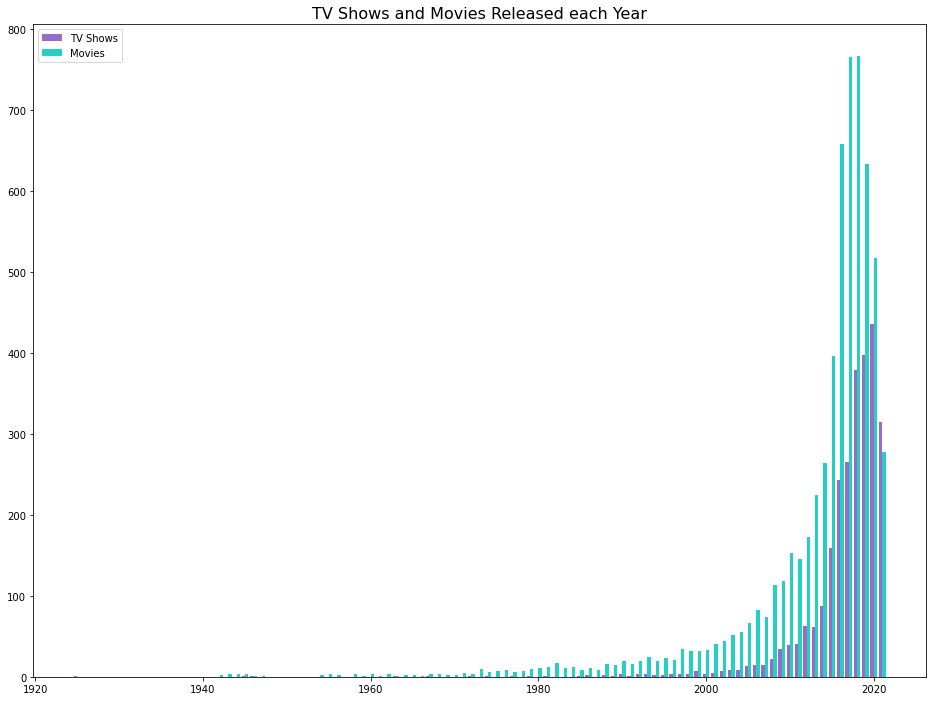

In [20]:
plt.figure(figsize = (16, 12))
plt.bar(tv_show_release_years['release_year'] - 0.2, tv_show_release_years['count'], 0.4, color = '#976cc6')
plt.bar(movie_release_years['release_year'] + 0.2, movie_release_years['count'], 0.4, color = '#25cfc6')

plt.legend(['TV Shows', 'Movies'])

plt.title('TV Shows and Movies Released each Year', size = '16')

plt.show()

### This shows that historically Movies were released more than TV Shows and the count of content released started exponentially increasing majorly from the yer 2000 onwards.

### In the past 5-6 years, the count of TV Shows being released have also increased, as compared to the previous growth.

### So, Netflix should add more recently released content or content released after 2010 preferably. 

# 

## In Which Month shall Content be Released?

In [21]:
tv_show_months = tv_show_df['month_added'].value_counts().reset_index()
tv_show_months = tv_show_months.rename(columns = {'month_added' : "count", "index" : 'month_added'})
tv_show_months['%age'] = tv_show_months['count'].apply(lambda x : 100 * x / sum(tv_show_months['count']))
tv_show_months = tv_show_months.sort_values('month_added')

tv_show_months

,month_added,count,%age
10,1,192,7.207207
11,2,180,6.756757
7,3,213,7.995495
6,4,214,8.033033
9,5,193,7.244745
4,6,236,8.858859
1,7,262,9.834835
3,8,236,8.858859
2,9,251,9.421922
5,10,215,8.070571


In [22]:
movie_months = movie_df['month_added'].value_counts().reset_index()
movie_months = movie_months.rename(columns = {'month_added' : "count", "index" : 'month_added'})
movie_months['%age'] = movie_months['count'].apply(lambda x : 100 * x / sum(movie_months['count']))
movie_months = movie_months.sort_values('month_added')

movie_months

,month_added,count,%age
3,1,545,8.896507
11,2,382,6.235717
5,3,528,8.619001
1,4,549,8.961802
10,5,439,7.166177
9,6,492,8.031342
0,7,565,9.222984
7,8,518,8.455762
6,9,518,8.455762
4,10,545,8.896507


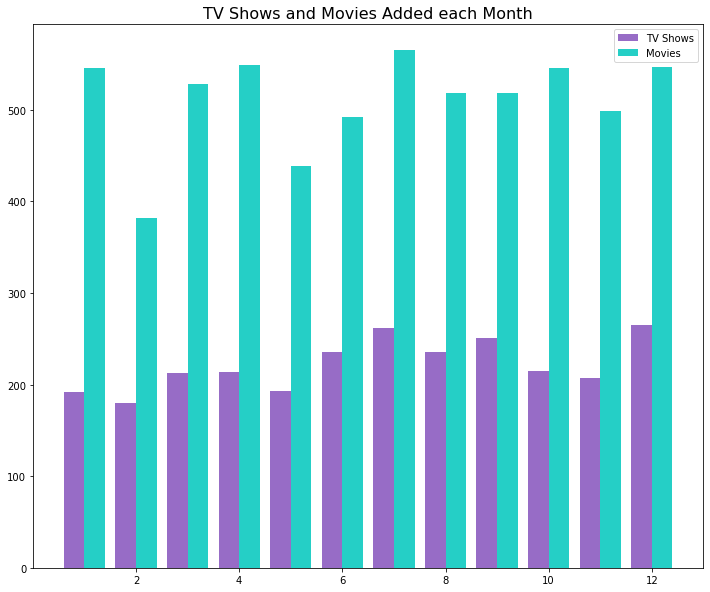

In [23]:
plt.figure(figsize = (12,10))
plt.bar(tv_show_months['month_added'] - 0.2, tv_show_months['count'], 0.4, color = '#976cc6')
plt.bar(movie_months['month_added'] + 0.2, movie_months['count'], 0.4, color = '#25cfc6')

plt.legend(['TV Shows', 'Movies'])

plt.title('TV Shows and Movies Added each Month', size = '16')

plt.show()

### This shows that TV Shows are released the least in February and the most in December.

### This shows that Movies are released the least in February and the most in July.

### From a Producer's point of view, it would be beneficial if you release any TV Show or Movie in the month of February as the least amount of content is added in this month so, competition would be significantly less.

# 

## Release of Content Month-Wise Over the Years

In [24]:
date_of_addition = df[['date_added']]
date_of_addition['year'] = df[['year_added']]
date_of_addition['month'] = df[['month_added']]

date_of_addition['month'] = date_of_addition['month'].apply(lambda x: calendar.month_abbr[x])
                                                                                                                                         
df1 = date_of_addition.groupby('year')['month'].value_counts().unstack().fillna(0).T

/var/folders/f2/h2z5v1pd3klgdmqks5h6ygh00000gn/T/ipykernel_30314/1848784781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_of_addition['year'] = df[['year_added']]
/var/folders/f2/h2z5v1pd3klgdmqks5h6ygh00000gn/T/ipykernel_30314/1848784781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_of_addition['month'] = df[['month_added']]
/var/folders/f2/h2z5v1pd3klgdmqks5h6ygh00000gn/T/ipykernel_30314/1848784781.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

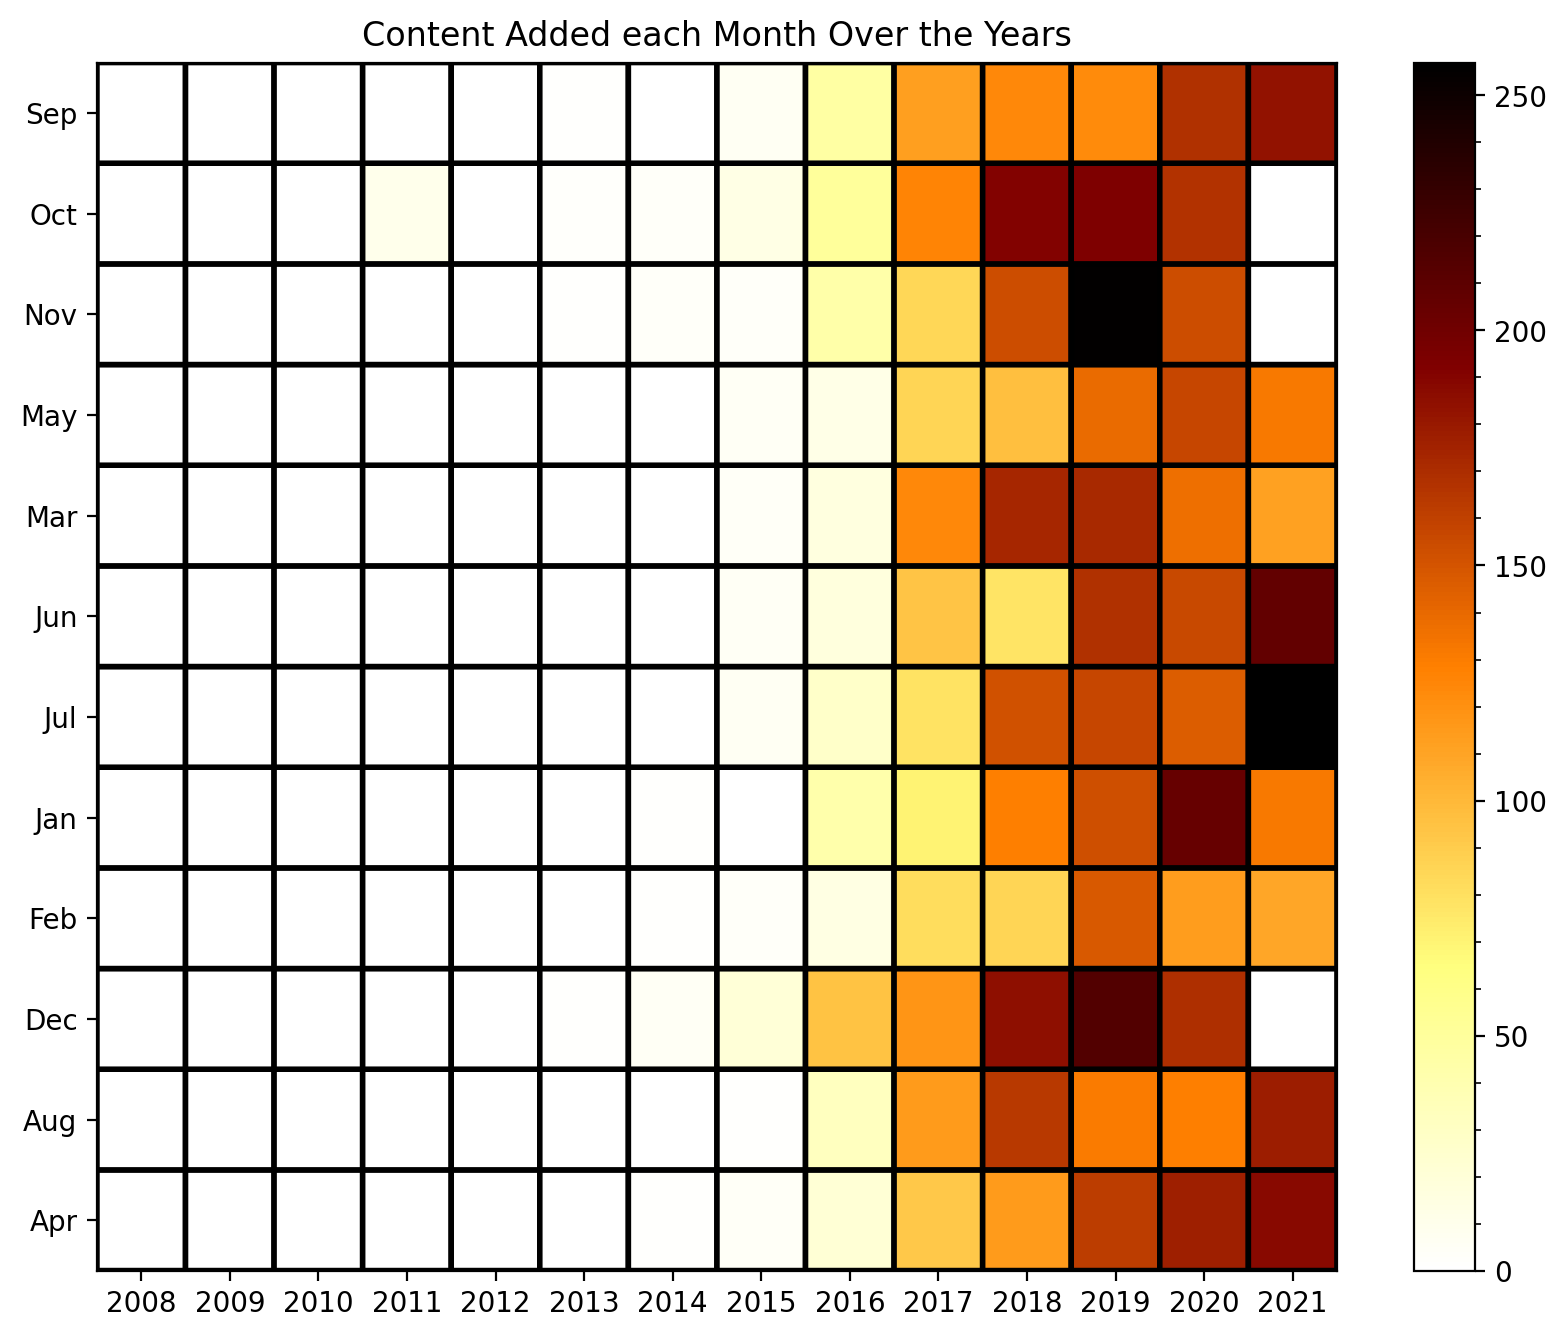

In [25]:
plt.figure(figsize = (10, 8), dpi = 200)
plt.pcolor(df1, cmap = 'afmhot_r', edgecolors = 'black', linewidths = 2) 
plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns)
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index)

cbar = plt.colorbar()

cbar.ax.tick_params(labelsize = 10) 
cbar.ax.minorticks_on()

plt.title('Content Added each Month Over the Years', size = '12')

plt.show()

### This shows the specific months over the years when less or more content was added to Netflix.

# 

## Ratings of TV Shows Released

In [26]:
tv_show_ratings = tv_show_df['rating'].value_counts().reset_index()
tv_show_ratings = tv_show_ratings.rename(columns = {'rating' : "count", "index" : 'rating'})
tv_show_ratings['%age'] = tv_show_ratings['count'].apply(lambda x : 100 * x / sum(tv_show_ratings['count']))
tv_show_ratings = tv_show_ratings.sort_values('rating')

tv_show_ratings

,rating,count,%age
6,NR,4,0.150150
7,R,2,0.075075
1,TV-14,730,27.402402
5,TV-G,94,3.528529
0,TV-MA,1143,42.905405
2,TV-PG,321,12.049550
4,TV-Y,175,6.569069
3,TV-Y7,194,7.282282
8,TV-Y7-FV,1,0.037538


Text(0.5, 1.0, 'Ratings of TV Shows')

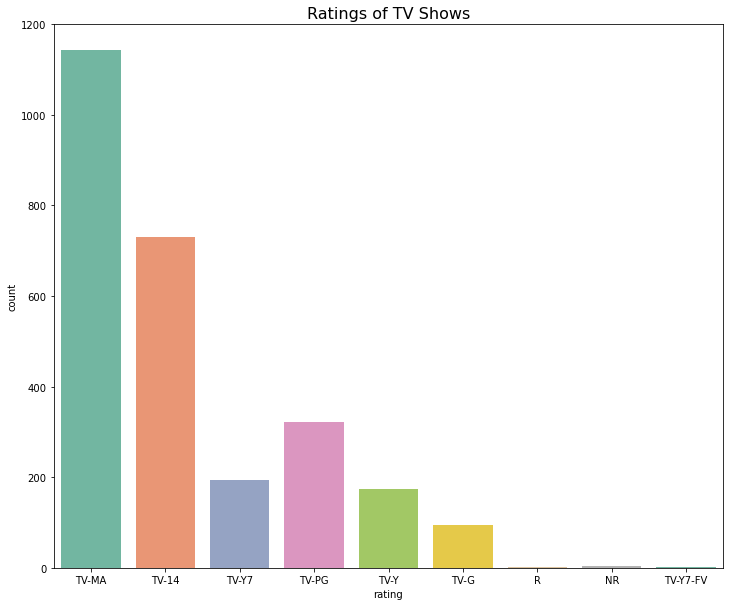

In [27]:
plt.figure(figsize = (12,10))
sns.countplot(x = 'rating', data = tv_show_df, palette = "Set2")

plt.title('Ratings of TV Shows', size = '16')

### This shows that TV-MA and TV-14 rated TV Shows are released the most so they are most likely to bring in more revenue due to more popularity.
### Whereas R, NR and TV-Y7-FV rated TV Shows are released the least so Netflix can avoid them accordingly.

# 

## Ratings of Movies Released

In [28]:
movie_ratings = movie_df['rating'].value_counts().reset_index()
movie_ratings = movie_ratings.rename(columns = {'rating' : "count", "index" : 'rating'})
movie_ratings['%age'] = movie_ratings['count'].apply(lambda x : 100 * x / sum(movie_ratings['count']))
movie_ratings = movie_ratings.sort_values('rating')

movie_ratings

,rating,count,%age
10,G,41,0.669278
12,NC-17,3,0.048972
9,NR,75,1.224290
5,PG,287,4.684949
4,PG-13,490,7.998694
2,R,797,13.010121
1,TV-14,1427,23.294156
8,TV-G,126,2.056807
0,TV-MA,2062,33.659811
3,TV-PG,540,8.814887


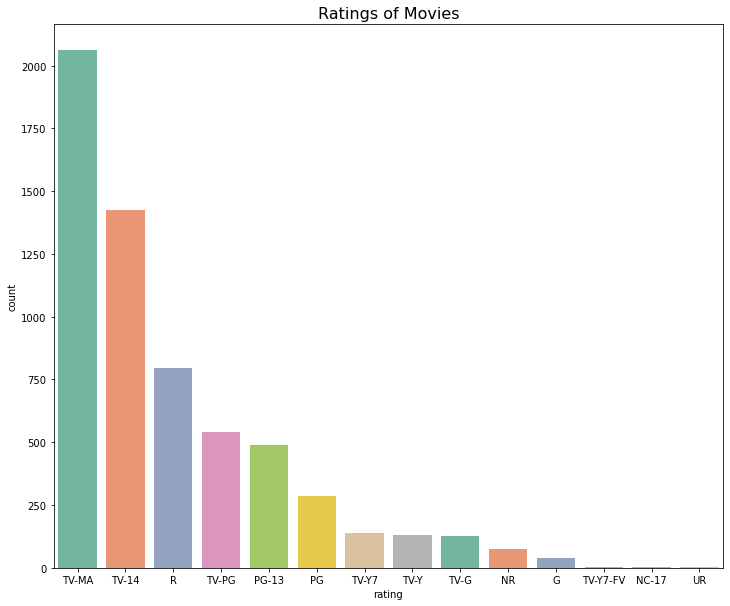

In [29]:
plt.figure(figsize = (12,10))
sns.countplot(x = 'rating', data = movie_df, palette = "Set2", order = movie_df['rating'].value_counts().index[0:14])

plt.title('Ratings of Movies', size = '16')

plt.show()

### This shows that TV-MA and TV-14 rated Movies are released the most so they are most likely to bring in more revenue due to more popularity.

### Whereas TV-Y7-FV, NC-17 and UR rated Movies are released the least so Netflix can avoid them accordingly.

# 

## Volume of Overall Content Released in Countries

In [30]:
countries_content = df['country'].value_counts().reset_index()
countries_content = countries_content.rename(columns = {'index' : "countries", "country" : 'count'})
countries_content

,countries,count
0,United States,3638
1,India,972
2,United Kingdom,418
3,Japan,243
4,South Korea,199
...,...,...
743,"Romania, Bulgaria, Hungary",1
744,"Uruguay, Guatemala",1
745,"France, Senegal, Belgium",1
746,"Mexico, United States, Spain, Colombia",1


Text(0.5, 1.0, 'Volume of Content Released in Countries')

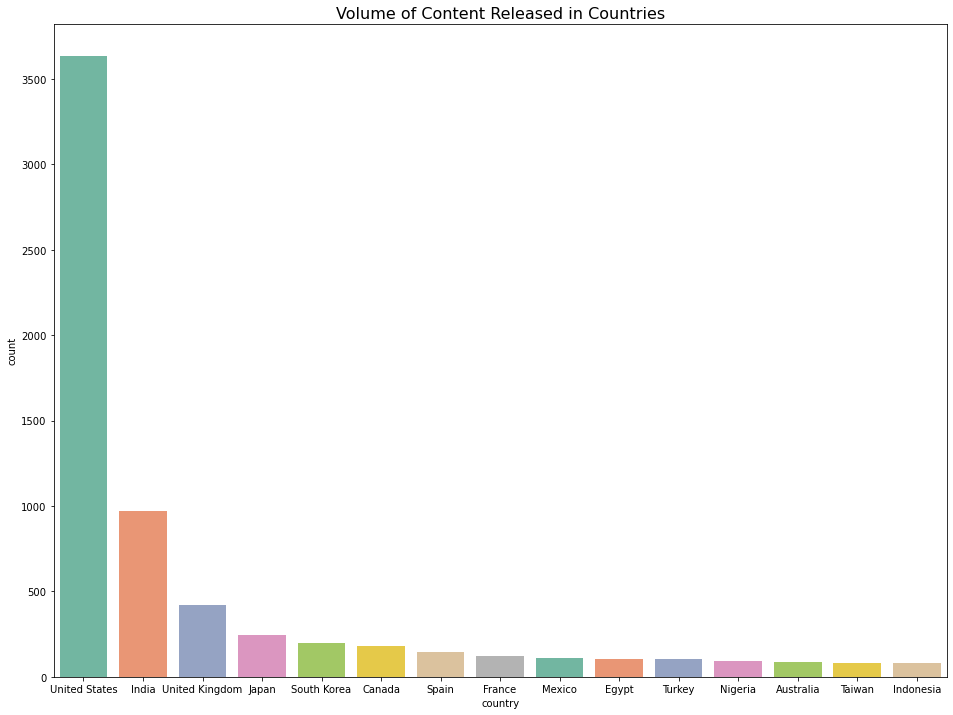

In [31]:
plt.figure(figsize = (16,12))
sns.countplot(x = 'country', data = df, palette = "Set2", order = df['country'].value_counts().index[0:15])

plt.title('Volume of Content Released in Countries',size = '16')

### This shows that the highest volume of content are Released in USA and India.

### As these are the biggest markets in the world, so Netflix should focus in these countries as a whole.

# 

## Volume of TV Shows Released in Countries

In [32]:
tv_show_countries_dic = {}

tv_show_countries_li = list(tv_show_df['country'])

for i in tv_show_countries_li:

    i = list(i.split(','))
    
    if (len(i) == 1):
        if i in list(tv_show_countries_dic.keys()):
            tv_show_countries_dic[i] += 1
        else:
            tv_show_countries_dic[i[0]] = 1
            
    else:
        for j in i:
            if j in list(tv_show_countries_dic.keys()):
                tv_show_countries_dic[j] += 1
            else:
                tv_show_countries_dic[j] = 1

In [33]:
tv_show_unique_countries = {}

for country, count in tv_show_countries_dic.items():
    country = country.replace(' ','')
    
    if country in list(tv_show_unique_countries.keys()):
        tv_show_unique_countries[country] += count
    else:
        tv_show_unique_countries[country] = count
        
tv_show_unique_countries = {k: v for k, v in sorted(tv_show_unique_countries.items(), key = lambda item: item[1], reverse = True)}

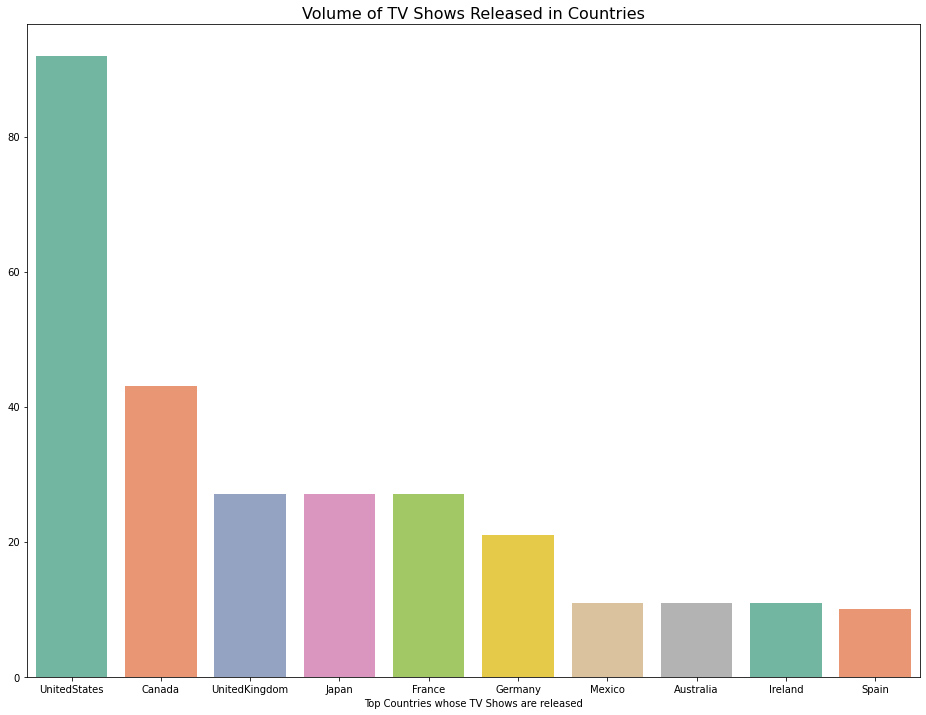

In [34]:
plt.figure(figsize = (16, 12))
ax = sns.barplot(x = list(tv_show_unique_countries.keys())[0:10], y = list(tv_show_unique_countries.values())[0:10], palette = "Set2")
ax.set(xlabel = 'Top Countries whose TV Shows are released')
ax.set_xticklabels(list(tv_show_unique_countries.keys())[0:10])

plt.title('Volume of TV Shows Released in Countries',size = '16')

plt.show()

### This shows that the highest volume of TV Shows are Released in USA and Canada.

### As these are the biggest markets in the world, so Netflix should focus in these countries for the TV Shows content.

# 

## Volume of Movies Released in Countries

In [35]:
movie_countries_dic = {}

movie_countries_li = list(movie_df['country'])

for i in movie_countries_li:

    i = list(i.split(','))
    
    if (len(i) == 1):
        if i in list(movie_countries_dic.keys()):
            movie_countries_dic[i] += 1
        else:
            movie_countries_dic[i[0]] = 1
            
    else:
        for j in i:
            if j in list(movie_countries_dic.keys()):
                movie_countries_dic[j] += 1
            else:
                movie_countries_dic[j] = 1

In [36]:
movie_unique_countries = {}

for country, count in movie_countries_dic.items():
    country = country.replace(' ','')
    
    if country in list(movie_unique_countries.keys()):
        movie_unique_countries[country] += count
    else:
        movie_unique_countries[country] = count
        
movie_unique_countries = {k: v for k, v in sorted(movie_unique_countries.items(), key = lambda item: item[1], reverse = True)}



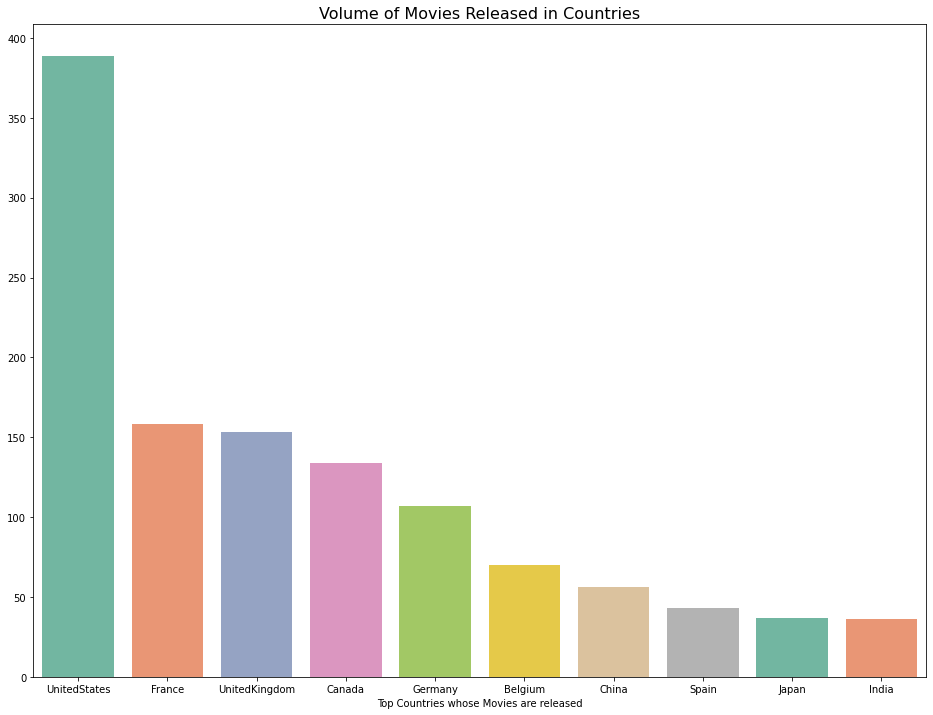

In [37]:
plt.figure(figsize = (16, 12))
ax = sns.barplot(x = list(movie_unique_countries.keys())[0:10], y = list(movie_unique_countries.values())[0:10], palette = "Set2")
ax.set(xlabel = 'Top Countries whose Movies are released')
ax.set_xticklabels(list(movie_unique_countries.keys())[0:10])

plt.title('Volume of Movies Released in Countries',size = '16')

plt.show()

### This shows that the highest volume of Movies are Released in USA and France.

### As these are the biggest markets in the world, so Netflix should focus in these countries for the Movie content.

# 

## Top Categories of TV Shows Released

In [38]:
tv_show_cat_dic = {}

tv_show_cat_li = list(tv_show_df['listed_in'])

for i in tv_show_cat_li:

    i = list(i.split(','))
    
    if (len(i) == 1):
        if i in list(tv_show_cat_dic.keys()):
            tv_show_cat_dic[i] += 1
        else:
            tv_show_cat_dic[i[0]] = 1
            
    else:
        for j in i:
            if j in list(tv_show_cat_dic.keys()):
                tv_show_cat_dic[j] += 1
            else:
                tv_show_cat_dic[j] = 1

In [39]:
tv_show_unique_cat = {}

for cat, count in tv_show_cat_dic.items():
    cat = cat.replace(' ','')
    
    if cat in list(tv_show_unique_cat.keys()):
        tv_show_unique_cat[cat] += count
    else:
        tv_show_unique_cat[cat] = count
        
tv_show_unique_cat = {k: v for k, v in sorted(tv_show_unique_cat.items(), key = lambda item: item[1], reverse = True)}

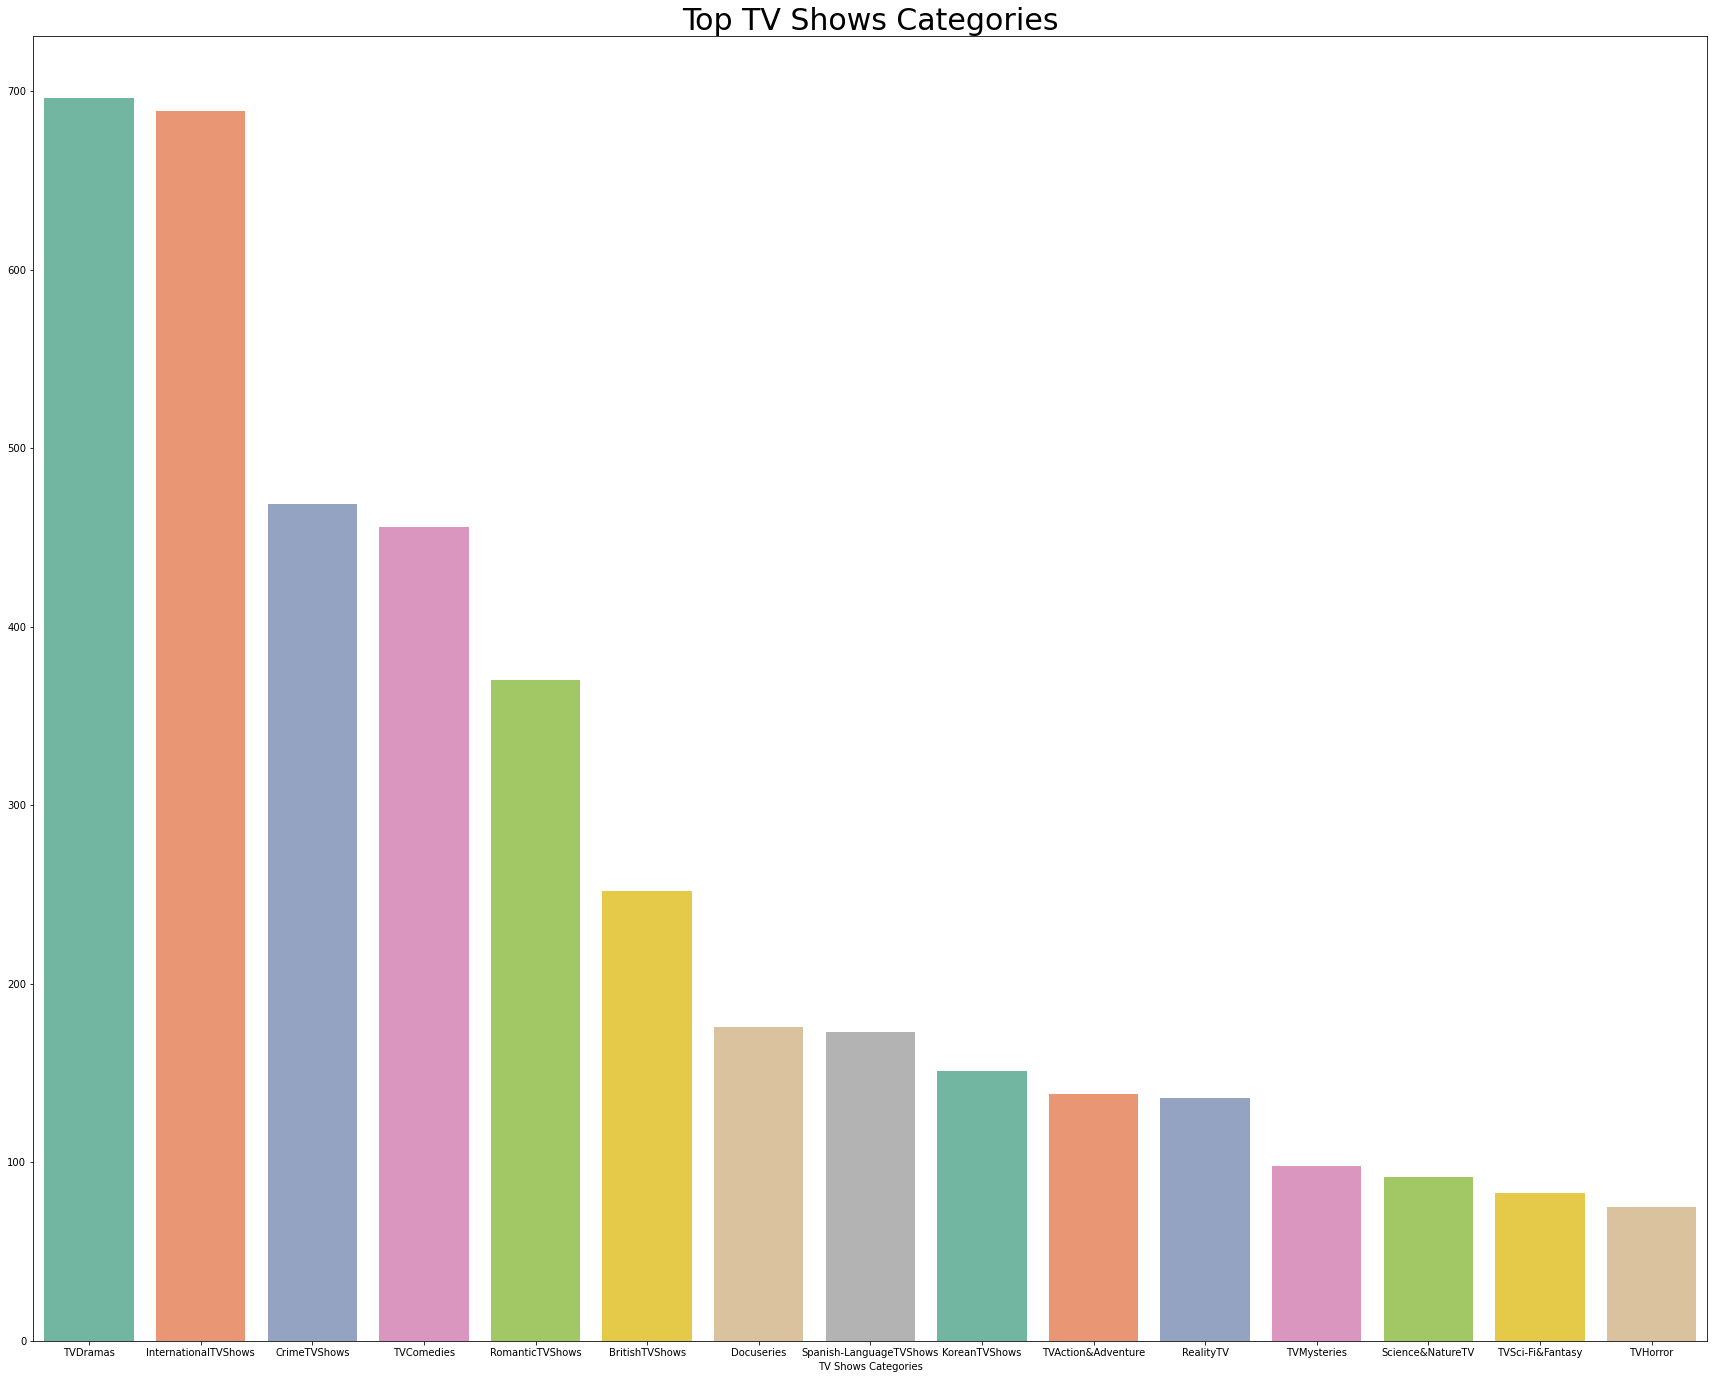

In [40]:
plt.figure(figsize = (30, 24))
ax = sns.barplot(x = list(tv_show_unique_cat.keys())[0:15], y = list(tv_show_unique_cat.values())[0:15], palette = "Set2")
ax.set(xlabel = 'TV Shows Categories')
ax.set_xticklabels(list(tv_show_unique_cat.keys()))[0:15]

plt.title('Top TV Shows Categories',size = '30')

plt.show()

### This shows that TV Dramas and International TV Shows are the most type of TV Shows released.

### So, Netflix can concentrate on releasing more TV Shows of these categories as compared to less popular categories.

# 

## Top Categories of Movies Released

In [41]:
movie_cat_dic = {}

movie_cat_li = list(movie_df['listed_in'])

for i in movie_cat_li:

    i = list(i.split(','))
    
    if (len(i) == 1):
        if i in list(movie_cat_dic.keys()):
            movie_cat_dic[i] += 1
        else:
            movie_cat_dic[i[0]] = 1
            
    else:
        for j in i:
            if j in list(movie_cat_dic.keys()):
                movie_cat_dic[j] += 1
            else:
                movie_cat_dic[j] = 1

In [42]:
movie_unique_cat = {}

for cat, count in movie_cat_dic.items():
    cat = cat.replace(' ','')
    
    if cat in list(movie_unique_cat.keys()):
        movie_unique_cat[cat] += count
    else:
        movie_unique_cat[cat] = count
        
movie_unique_cat = {k: v for k, v in sorted(movie_unique_cat.items(), key = lambda item: item[1], reverse = True)}

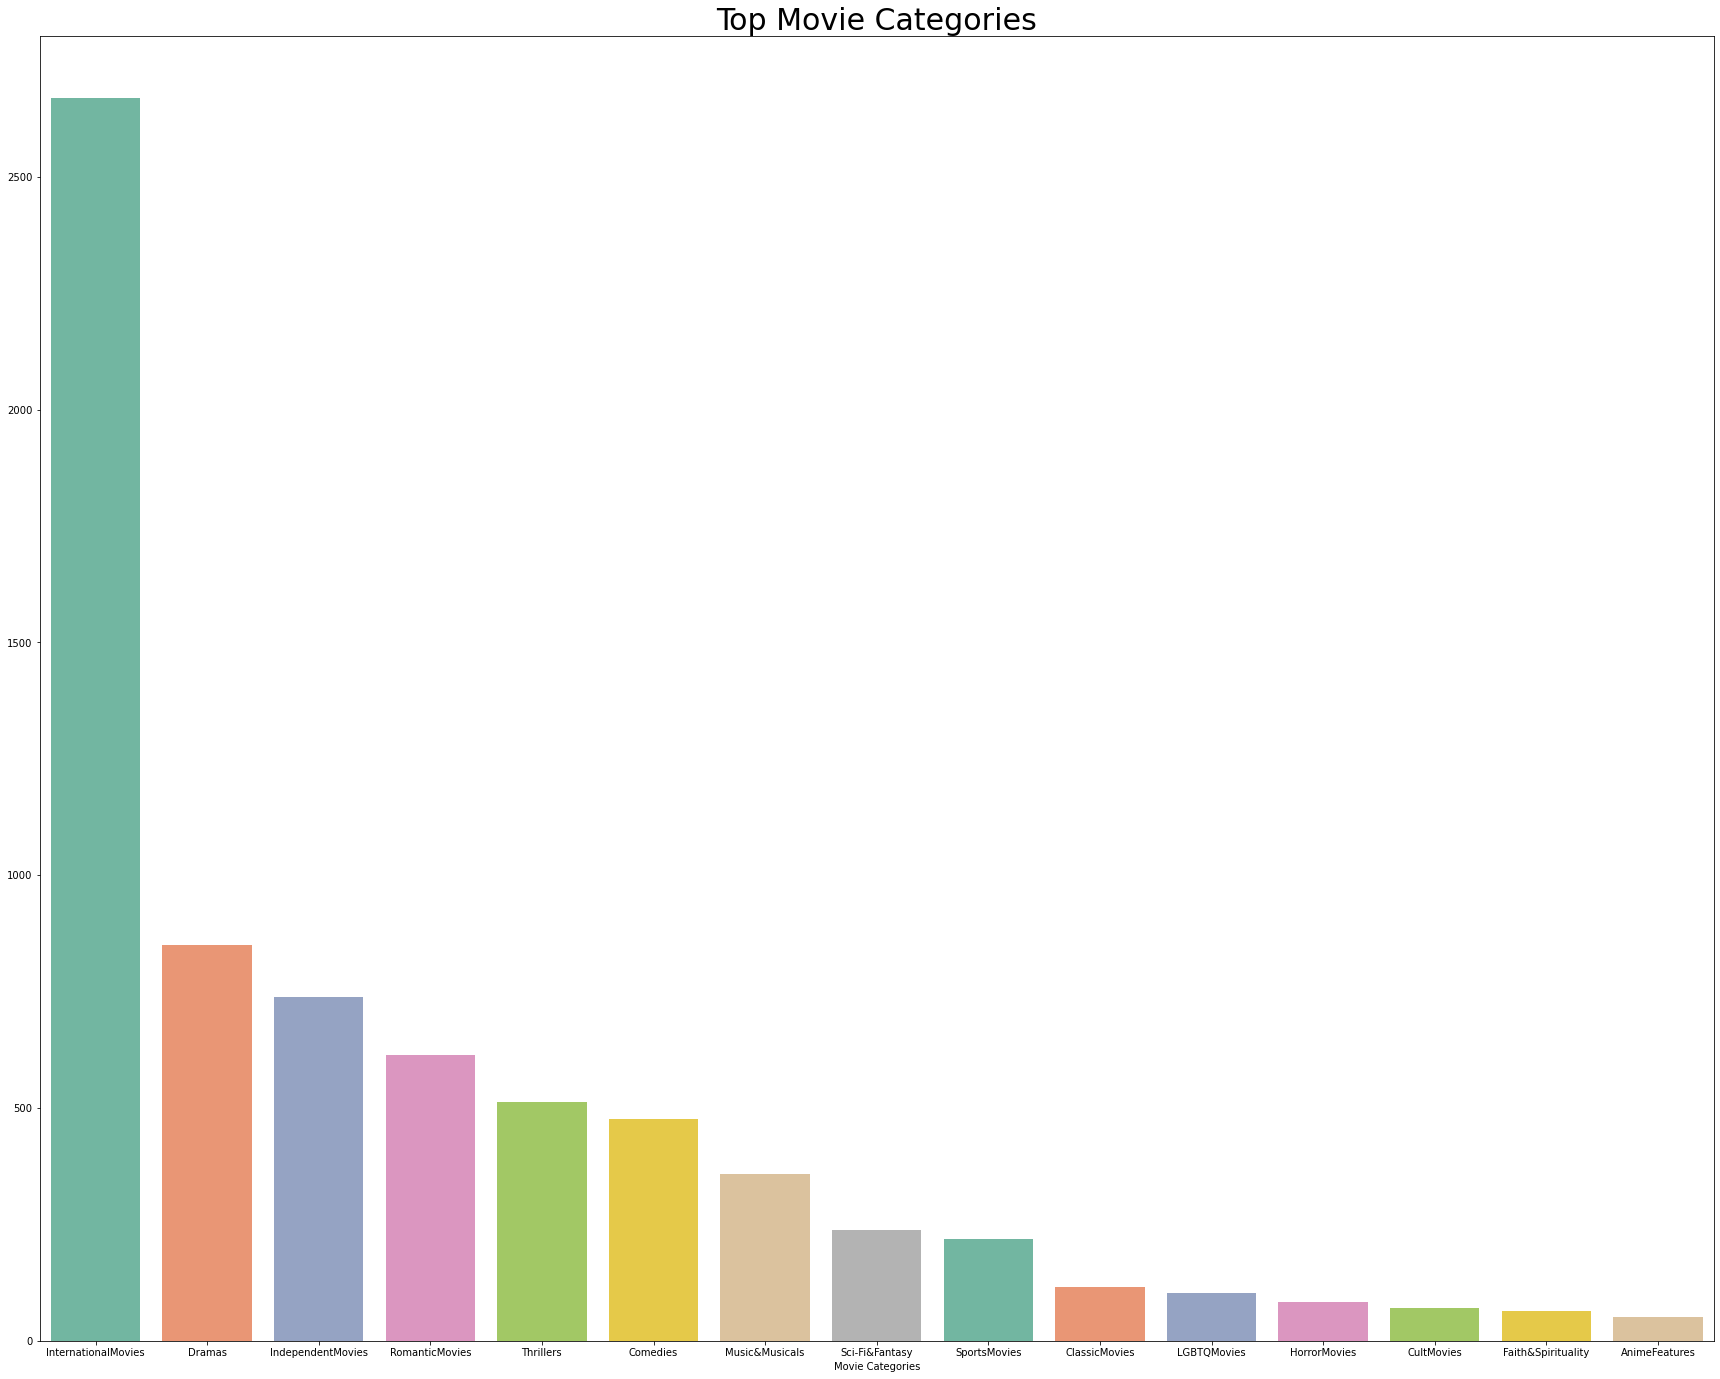

In [43]:
plt.figure(figsize = (30, 24))
ax = sns.barplot(x = list(movie_unique_cat.keys())[0:15], y = list(movie_unique_cat.values())[0:15], palette = "Set2")
ax.set(xlabel = 'Movie Categories')
ax.set_xticklabels(list(movie_unique_cat.keys()))[0:15]

plt.title('Top Movie Categories',size = '30')

plt.show()

### This shows that International Movies and Dramas are the most type of Movies released.
### So, Netflix can concentrate on releasing more Movies of these categories as compared to less popular categories.

# 

## Top TV Shows Directors

In [44]:
tv_show_director_dic = {}

tv_show_director_li = list(tv_show_df['director'])

for i in tv_show_director_li:

    i = list(i.split(','))
    
    if (len(i) == 1):
        if i in list(tv_show_director_dic.keys()):
            tv_show_director_dic[i] += 1
        else:
            tv_show_director_dic[i[0]] = 1
            
    else:
        for j in i:
            if j in list(tv_show_director_dic.keys()):
                tv_show_director_dic[j] += 1
            else:
                tv_show_director_dic[j] = 1

In [45]:
tv_show_unique_director = {}

for direc, count in tv_show_director_dic.items():
    direc = direc.replace(' ','')
    
    if cat in list(tv_show_unique_director.keys()):
        tv_show_unique_director[direc] += count
    else:
        tv_show_unique_director[direc] = count
        
tv_show_unique_director = {k: v for k, v in sorted(tv_show_unique_director.items(), key = lambda item: item[1], reverse = True)}

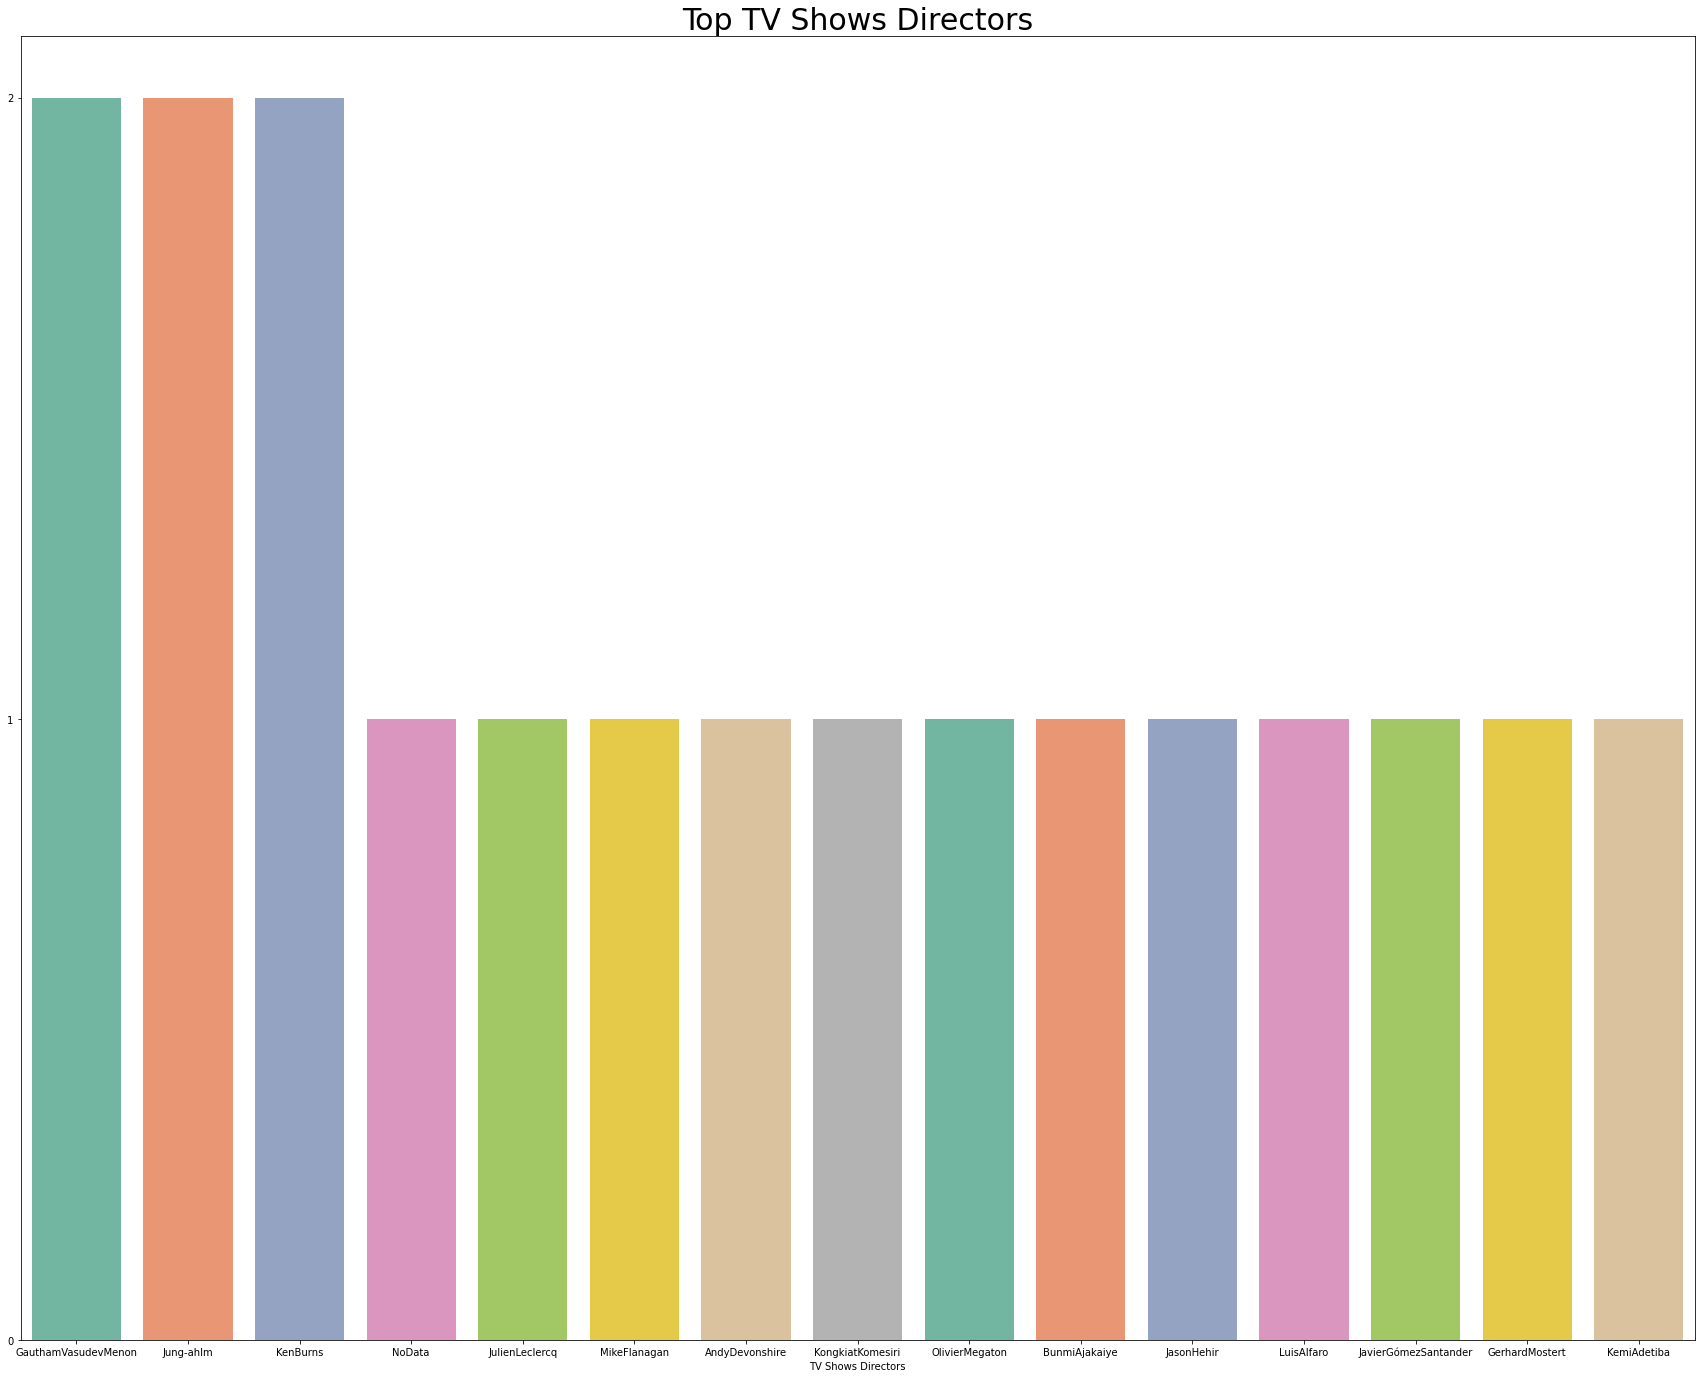

In [46]:
plt.figure(figsize = (30, 24))
ax = sns.barplot(x = list(tv_show_unique_director.keys())[0:15], y = list(tv_show_unique_director.values())[0:15], palette = "Set2")
ax.set(xlabel = 'TV Shows Directors')
ax.set_xticklabels(list(tv_show_unique_director.keys()))[0:15]
ax.set_yticks(np.arange(0, 3))

plt.title('Top TV Shows Directors',size = '30')

plt.show()

### This shows that almost all the Directors have the same experience ranging from 1-2 TV Shows for the Top Directors.

### So, adding content based on the Director name isn't much fruitful.

# 

## Top Movies Directors

In [47]:
movie_director_dic = {}

movie_director_li = list(movie_df['director'])

for i in movie_director_li:

    i = list(i.split(','))
    
    if (len(i) == 1):
        if i in list(movie_director_dic.keys()):
            movie_director_dic[i] += 1
        else:
            movie_director_dic[i[0]] = 1
            
    else:
        for j in i:
            if j in list(movie_director_dic.keys()):
                movie_director_dic[j] += 1
            else:
                movie_director_dic[j] = 1

In [48]:
movie_unique_director = {}

for direc, count in movie_director_dic.items():
    direc = direc.replace(' ','')
    
    if cat in list(movie_unique_director.keys()):
        movie_unique_director[direc] += count
    else:
        movie_unique_director[direc] = count
        
movie_unique_director = {k: v for k, v in sorted(movie_unique_director.items(), key = lambda item: item[1], reverse = True)}

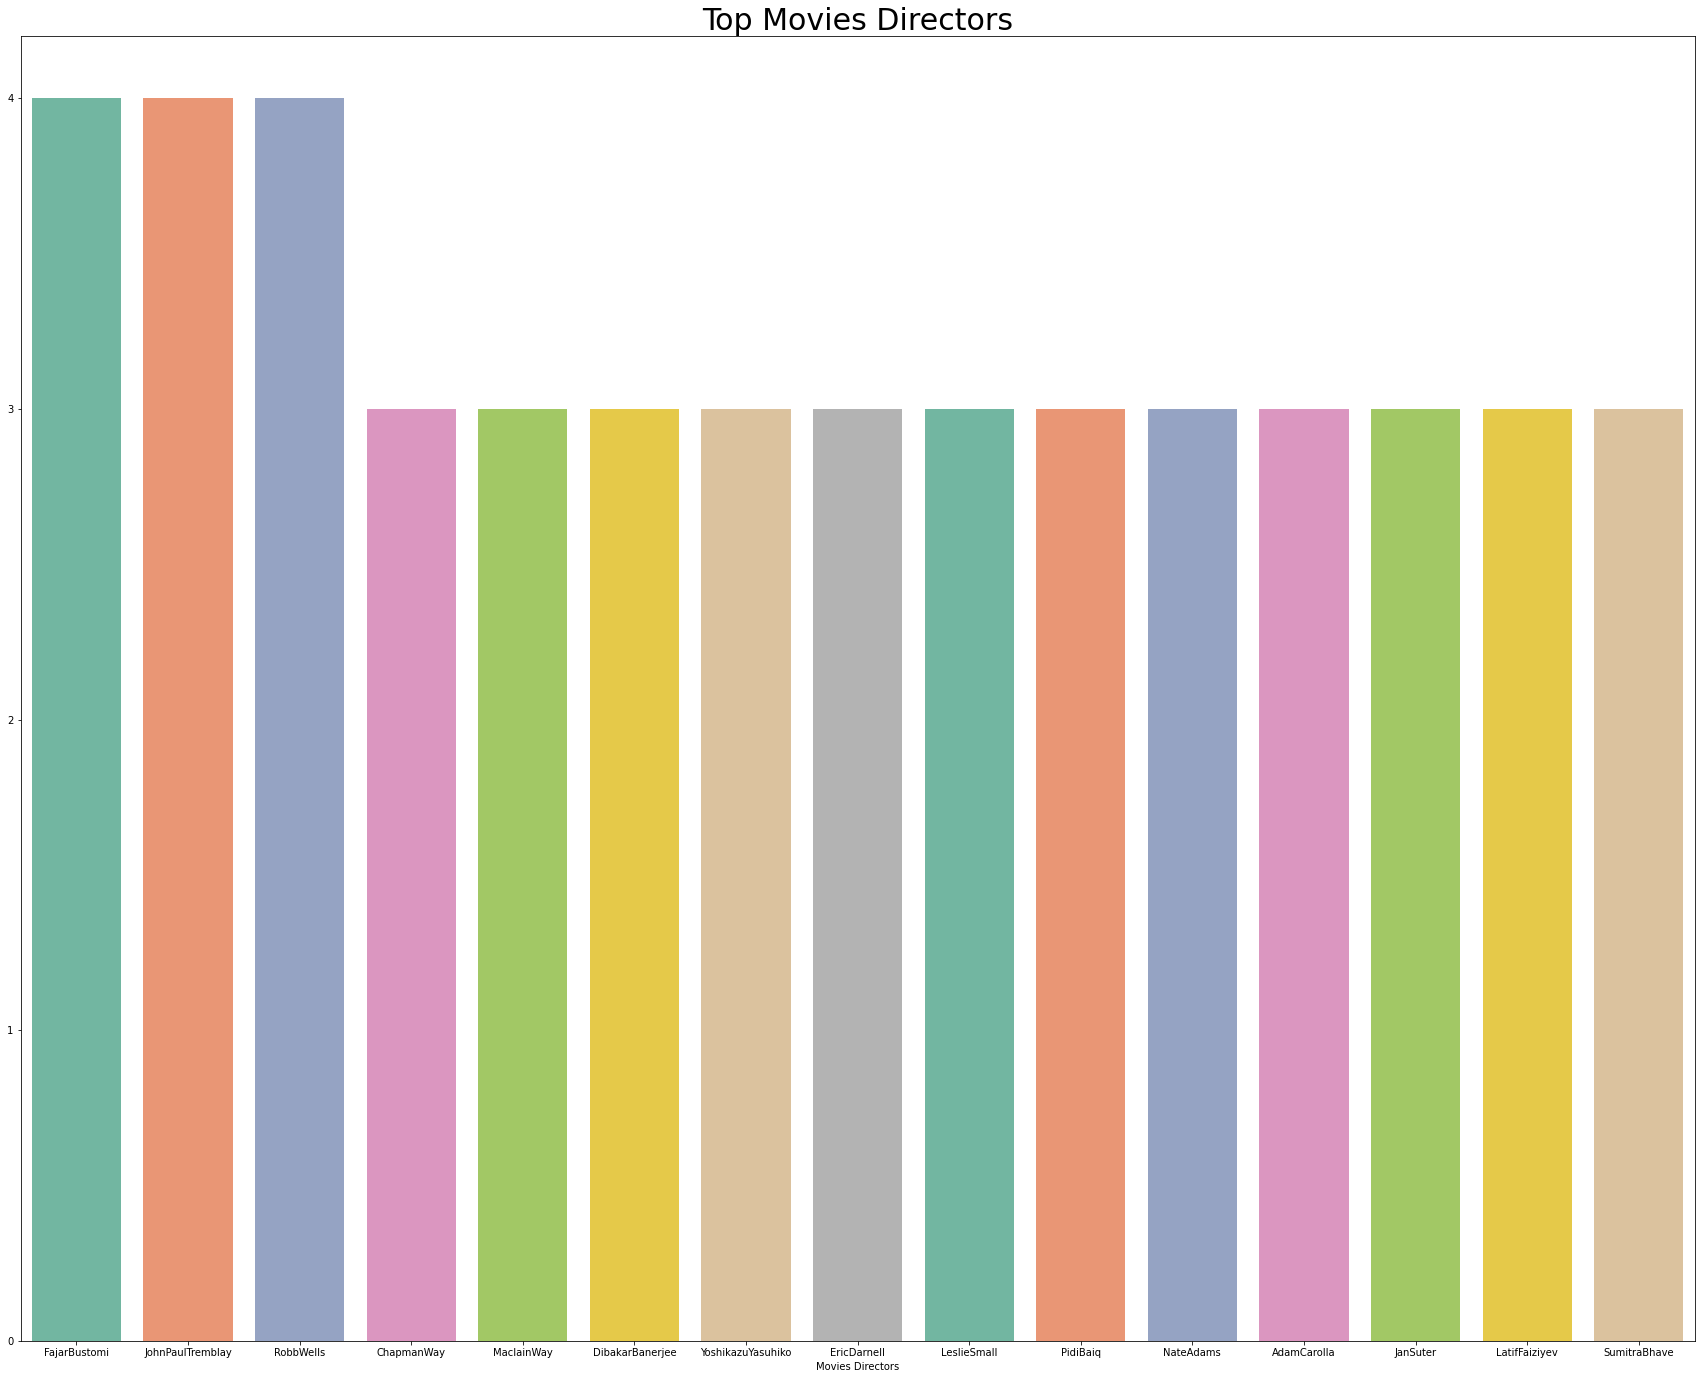

In [49]:
plt.figure(figsize = (30, 24))
ax = sns.barplot(x = list(movie_unique_director.keys())[0:15], y = list(movie_unique_director.values())[0:15], palette = "Set2")
ax.set(xlabel = 'Movies Directors')
ax.set_xticklabels(list(movie_unique_director.keys()))[0:15]
ax.set_yticks(np.arange(0, 5))

plt.title('Top Movies Directors',size = '30')

plt.show()

### This shows that almost all the Directors have the same experience ranging from 3-4 Movies for the Top Directors.

### So, Netflix can prefer the highly experienced Directors and it is suggested that they should not add content solely on this metric.

# 

## Top TV Shows Actors

In [50]:
tv_show_actor_dic = {}

tv_show_actor_li = list(tv_show_df['cast'])

for i in tv_show_actor_li:

    i = list(i.split(','))
    
    if (len(i) == 1):
        if i in list(tv_show_actor_dic.keys()):
            tv_show_actor_dic[i] += 1
        else:
            tv_show_actor_dic[i[0]] = 1
            
    else:
        for j in i:
            if j in list(tv_show_actor_dic.keys()):
                tv_show_actor_dic[j] += 1
            else:
                tv_show_actor_dic[j] = 1

In [51]:
tv_show_unique_actor = {}

for cast, count in tv_show_actor_dic.items():
    cast = cast.replace(' ','')
    
    if cat in list(tv_show_unique_actor.keys()):
        tv_show_unique_actor[cast] += count
    else:
        tv_show_unique_actor[cast] = count
        
tv_show_unique_actor = {k: v for k, v in sorted(tv_show_unique_actor.items(), key = lambda item: item[1], reverse = True)}

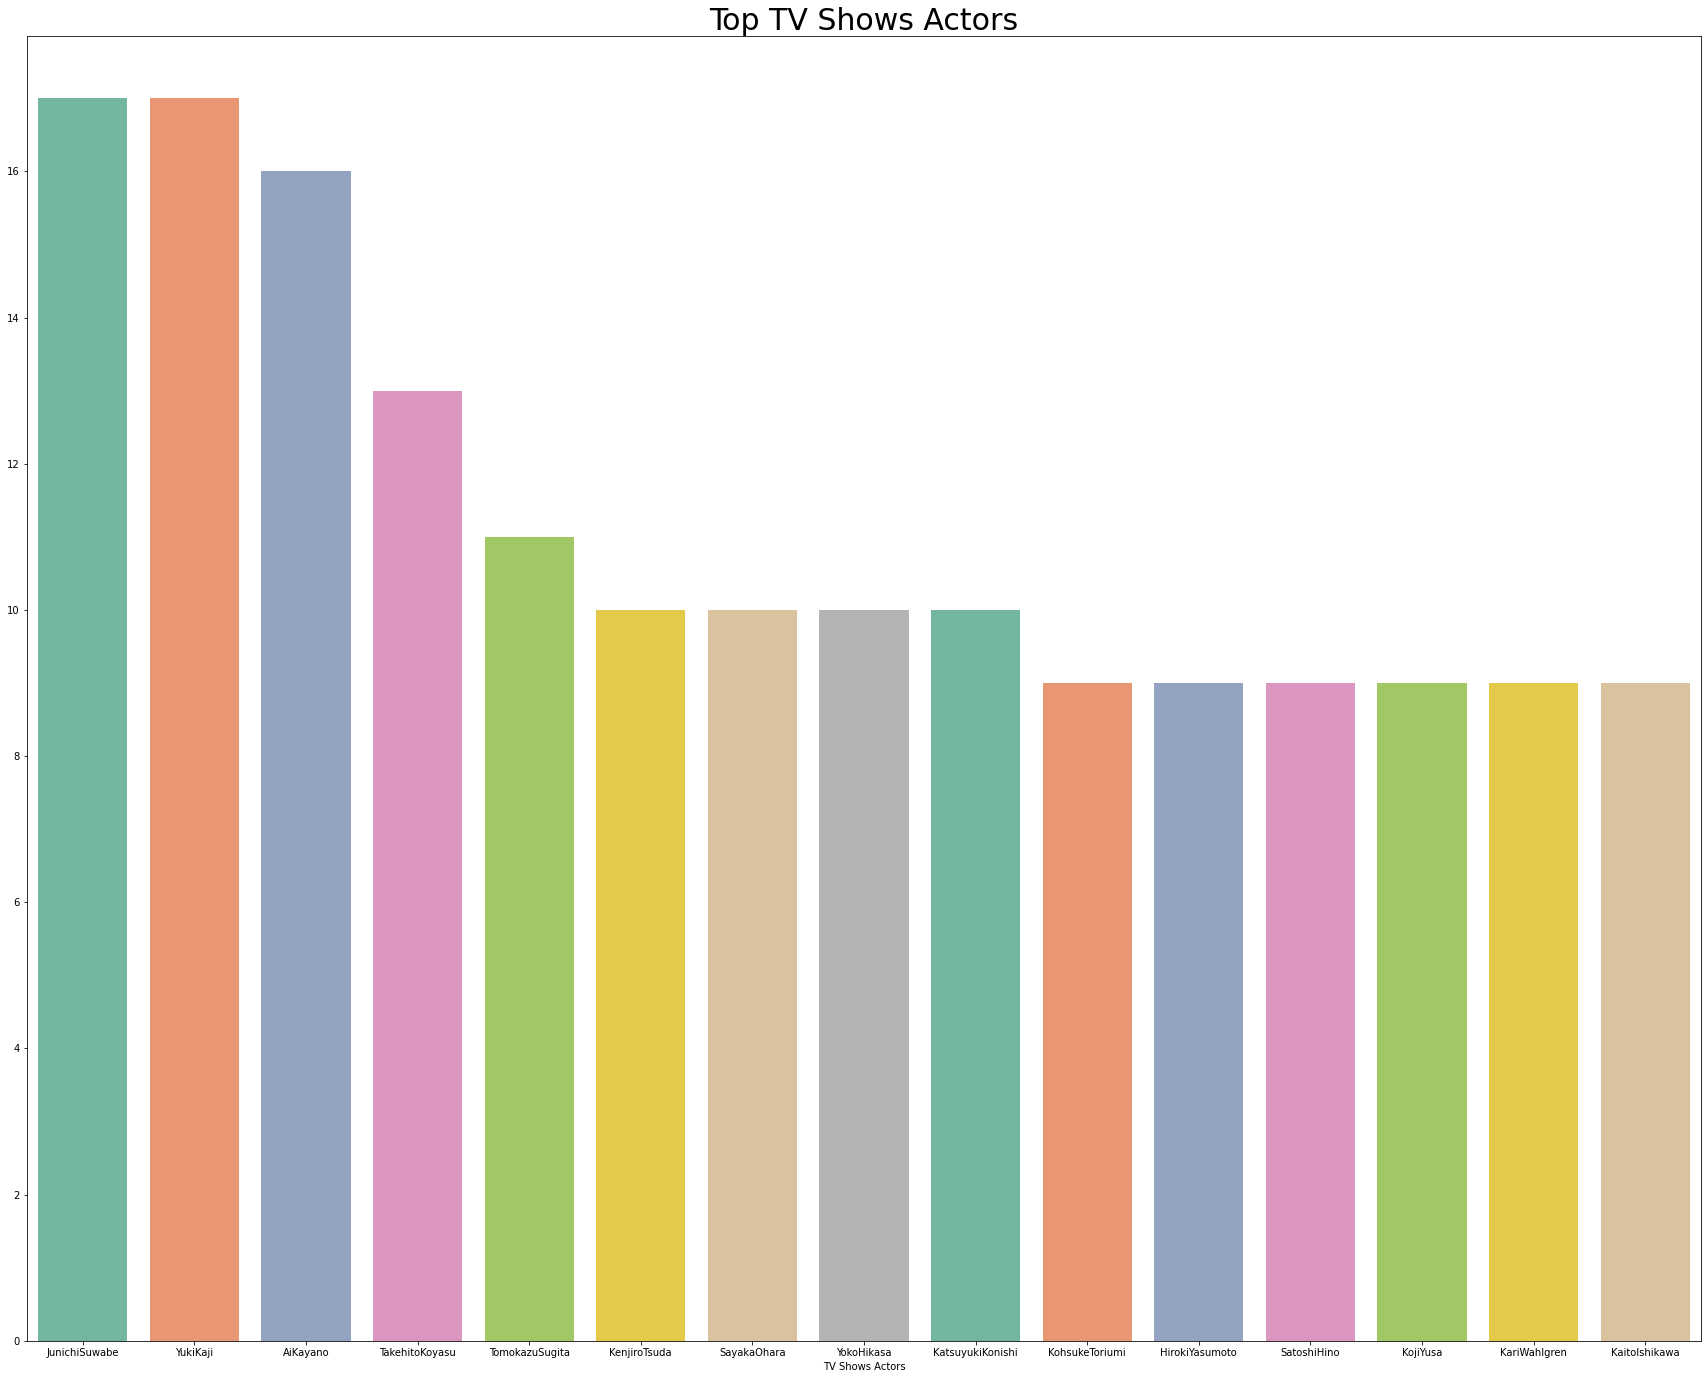

In [52]:
plt.figure(figsize = (30, 24))
ax = sns.barplot(x = list(tv_show_unique_actor.keys())[0:15], y = list(tv_show_unique_actor.values())[0:15], palette = "Set2")
ax.set(xlabel = 'TV Shows Actors')
ax.set_xticklabels(list(tv_show_unique_actor.keys()))[0:15]

plt.title('Top TV Shows Actors',size = '30')

plt.show()

### This shows that Junichi Suwabe, Yuki Kaji and Ai Kayano have the most TV Shows released on Netflix.

### So, Netflix should add more TV Shows of these popular actors on their platform.

# 

# Top Movies Actors

In [53]:
movie_actor_dic = {}

movie_actor_li = list(movie_df['cast'])

for i in movie_actor_li:

    i = list(i.split(','))
    
    if (len(i) == 1):
        if i in list(movie_actor_dic.keys()):
            movie_actor_dic[i] += 1
        else:
            movie_actor_dic[i[0]] = 1
            
    else:
        for j in i:
            if j in list(movie_actor_dic.keys()):
                movie_actor_dic[j] += 1
            else:
                movie_actor_dic[j] = 1

In [54]:
movie_unique_actor = {}

for cast, count in movie_actor_dic.items():
    cast = cast.replace(' ','')
    
    if cat in list(movie_unique_actor.keys()):
        movie_unique_actor[cast] += count
    else:
        movie_unique_actor[cast] = count
        
movie_unique_actor = {k: v for k, v in sorted(movie_unique_actor.items(), key = lambda item: item[1], reverse = True)}

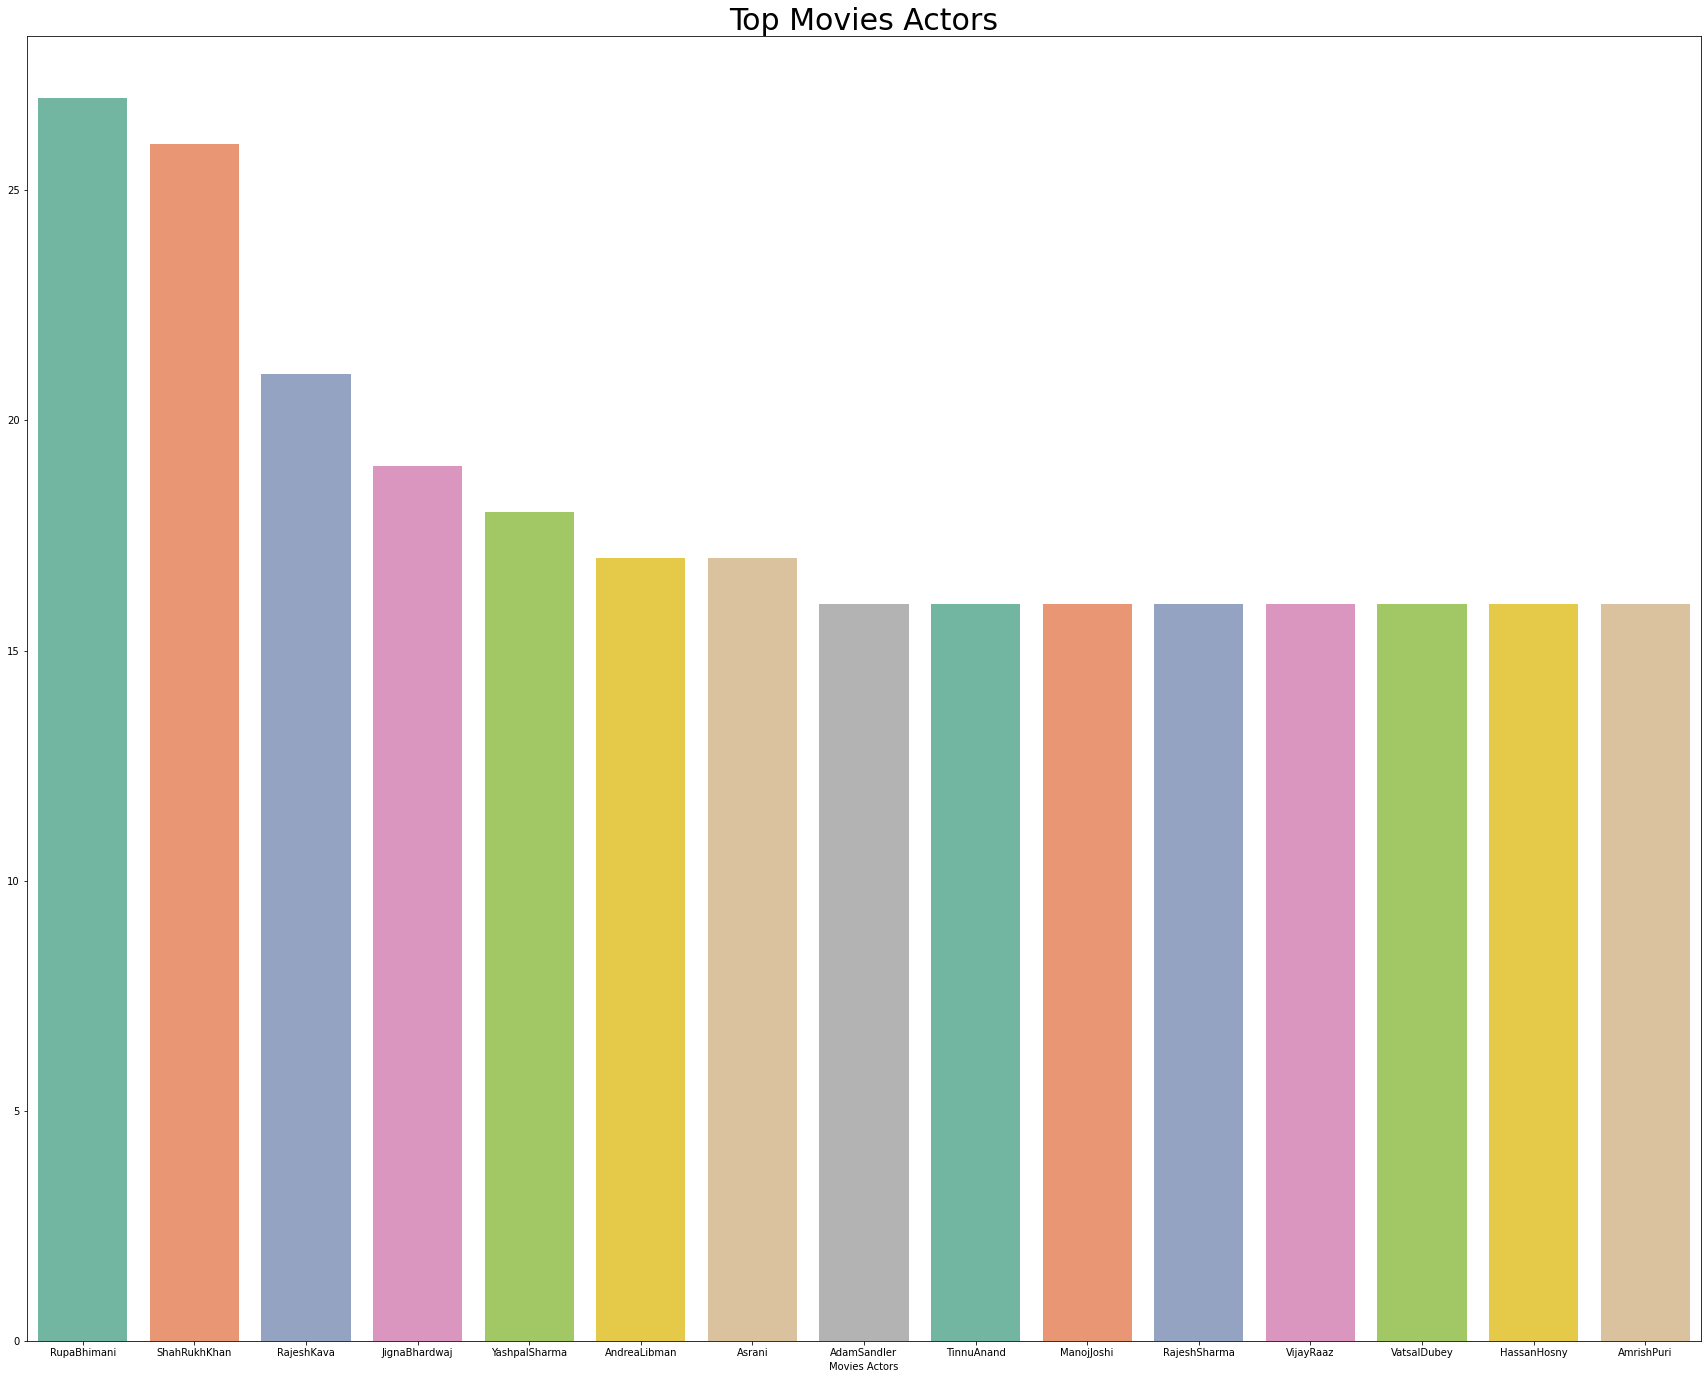

In [55]:
plt.figure(figsize = (30, 24))
ax = sns.barplot(x = list(movie_unique_actor.keys())[0:15], y = list(movie_unique_actor.values())[0:15], palette = "Set2")
ax.set(xlabel = 'Movies Actors')
ax.set_xticklabels(list(movie_unique_actor.keys()))[0:15]

plt.title('Top Movies Actors',size = '30')

plt.show()

### This shows that Rupa Bhimani and Shah Rukh Khan have the most Movies released on Netflix.
### So, Netflix should add more Movies of these popular actors on their platform.

# 

## Best Length of TV Shows

In [56]:
tv_show_seasons = tv_show_df['season_count'].value_counts().reset_index()
tv_show_seasons = tv_show_seasons.rename(columns = {'season_count' : "count", "index" : 'season_count'})
tv_show_seasons['%age'] = tv_show_seasons['count'].apply(lambda x : 100 * x / sum(tv_show_seasons['count']))
tv_show_seasons = tv_show_seasons.sort_values('count', ascending = False)

tv_show_seasons

,season_count,count,%age
0,1,1791,67.229730
1,2,421,15.803303
2,3,198,7.432432
3,4,94,3.528529
4,5,64,2.402402
5,6,33,1.238739
6,7,23,0.863363
7,8,17,0.638138
8,9,9,0.337838
9,10,6,0.225225


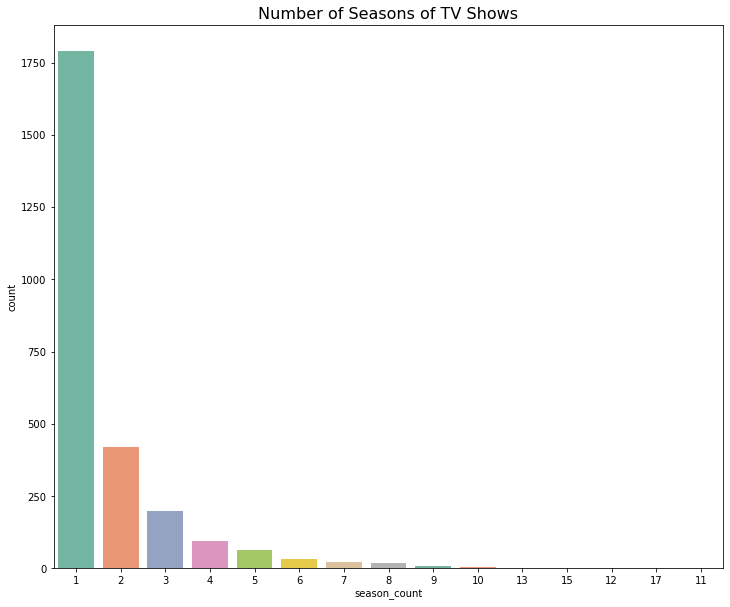

In [57]:
plt.figure(figsize = (12,10))
sns.countplot(x = 'season_count', data = tv_show_df, palette = "Set2", order = tv_show_seasons.sort_values('count', ascending = False).season_count)

plt.title('Number of Seasons of TV Shows', size = '16')
plt.show()

### This shows that seasons with a single or double Seasons are the most popular.
### So, Netflix should avoid TV Shows with too much Seasons but instead add fewer Season TV Shows.

# 

## Best Duration of Movies

In [58]:
movie_df['duration'] = movie_df['duration'].str.replace('min','')
movie_df['duration'] = movie_df['duration'].astype(str).astype(int)

/var/folders/f2/h2z5v1pd3klgdmqks5h6ygh00000gn/T/ipykernel_30314/988277391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = movie_df['duration'].str.replace('min','')
/var/folders/f2/h2z5v1pd3klgdmqks5h6ygh00000gn/T/ipykernel_30314/988277391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration'] = movie_df['duration'].astype(str).astype(int)


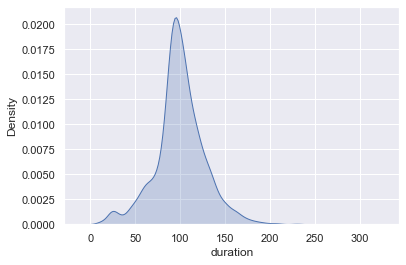

In [59]:
sns.set(style = "darkgrid")
sns.kdeplot(data = movie_df['duration'], shade = True)
plt.show()

### This shows that the best duration of a movie is between 80 - 130 mins.

### So, instead of adding Movies of long duration of more than 150 mins, Netflix should add more Movies from the above mentioned range.

# 